In [129]:
from bs4 import BeautifulSoup
import requests
import requests
import lxml.html as lh
import pandas as pd
import copy
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from seaborn import set

In [130]:
import pandas as pd
from pandas import Series,DataFrame

In [131]:
url ="https://www.start.umd.edu/gtd/search/Results.aspx?expanded=no&casualties_type=&casualties_max=&success=yes&country=92&ob=GTDID&od=desc&page=1&count=100#results-table"

In [150]:
url ="https://www.start.umd.edu/gtd/search/Results.aspx?page=1&casualties_type=&casualties_max=&country=92&count=100&charttype=line&chart=overtime&ob=GTDID&od=desc&expanded=yes#results-table"
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

ConnectionError: HTTPSConnectionPool(host='www.start.umd.edu', port=443): Max retries exceeded with url: /gtd/search/Results.aspx?page=1&casualties_type=&casualties_max=&country=92&count=100&charttype=line&chart=overtime&ob=GTDID&od=desc&expanded=yes (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000000BE83E08CF8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [133]:
#Check the length of the first 12 rows
[len(T) for T in tr_elements[:12]]


[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [134]:
tr_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"GTD ID"
2:"DATE"
3:"COUNTRY"
4:"CITY"
5:"PERPETRATOR GROUP"
6:"FATALITIES"
7:"INJURED"
8:"TARGET TYPE"
9:"REGION"
10:"ATTACK TYPE"
11:"WEAPON TYPE"


In [135]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=11:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [136]:
[len(C) for (title,C) in col]

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [137]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
df

,GTD ID,DATE,COUNTRY,CITY,PERPETRATOR GROUP,FATALITIES,INJURED,TARGET TYPE,REGION,ATTACK TYPE,WEAPON TYPE
0,201712310031,2017-12-31,India,Imphal,Unknown,0,0,Government (General),South Asia,Bombing/Explosion,Explosives/Bombs/Dynamite
1,201712310019,2017-12-31,India,Hungrum,Zeliangrong United Front,0,0,Government (General),South Asia,Hostage Taking (Kidnapping),Firearms
2,201712310005,2017-12-31,India,Lethapora,Jaish-e-Mohammad (JeM),8,3,Police,South Asia,Armed Assault,"Explosives/Bombs/Dynamite,Firearms"
3,201712300023,2017-12-30,India,Toylanka,Communist Party of India - Maoist (CPI-Maoist),0,0,Business,South Asia,Facility/Infrastructure Attack,"Firearms,Incendiary"
4,201712300021,2017-12-30,India,Koothuparamba,Unknown,0,0,Police,South Asia,Bombing/Explosion,Explosives/Bombs/Dynamite
5,201712300019,2017-12-28,India,Talacheru,Unknown,1,0,Religious Figures/Institutions,South Asia,Facility/Infrastructure Attack,"Incendiary,Unknown"
6,201712280035,2017-12-28,India,Pandrasali,Unknown,0,0,Business,South Asia,"Hostage Taking (Barricade Incident),Facility/I...","Firearms,Incendiary"
7,201712280031,2017-12-28,India,Motbung,"Kuki Tribal Militants (suspected),Manipur Naga...",0,0,Private Citizens & Property,South Asia,Hostage Taking (Kidnapping),Firearms
8,201712280023,2017-12-28,India,Sahajpur-Sahiyaar,Maoists,0,0,Business,South Asia,Facility/Infrastructure Attack,Incendiary
9,201712270035,2017-12-27,India,Basaguda,Unknown,0,0,Unknown,South Asia,Bombing/Explosion,Explosives/Bombs/Dynamite


In [138]:
# Renaming the column for better understanding of the DataSet
df.rename({'GTD_ID':'ID','DATE':'date','COUNTRY':'country','CITY':'city',\
               'PERPETRATOR GROUP':'group','FATALITIES':'fatalities', 'INJURED':'injured',\
               'TARGET TYPE':'target_type', 'REGION':'region','ATTACK TYPE':'attack_type',\
               'WEAPON TYPE':'weapon_type'}, axis='columns',inplace=True)
df

,GTD ID,date,country,city,group,fatalities,injured,target_type,region,attack_type,weapon_type
0,201712310031,2017-12-31,India,Imphal,Unknown,0,0,Government (General),South Asia,Bombing/Explosion,Explosives/Bombs/Dynamite
1,201712310019,2017-12-31,India,Hungrum,Zeliangrong United Front,0,0,Government (General),South Asia,Hostage Taking (Kidnapping),Firearms
2,201712310005,2017-12-31,India,Lethapora,Jaish-e-Mohammad (JeM),8,3,Police,South Asia,Armed Assault,"Explosives/Bombs/Dynamite,Firearms"
3,201712300023,2017-12-30,India,Toylanka,Communist Party of India - Maoist (CPI-Maoist),0,0,Business,South Asia,Facility/Infrastructure Attack,"Firearms,Incendiary"
4,201712300021,2017-12-30,India,Koothuparamba,Unknown,0,0,Police,South Asia,Bombing/Explosion,Explosives/Bombs/Dynamite
5,201712300019,2017-12-28,India,Talacheru,Unknown,1,0,Religious Figures/Institutions,South Asia,Facility/Infrastructure Attack,"Incendiary,Unknown"
6,201712280035,2017-12-28,India,Pandrasali,Unknown,0,0,Business,South Asia,"Hostage Taking (Barricade Incident),Facility/I...","Firearms,Incendiary"
7,201712280031,2017-12-28,India,Motbung,"Kuki Tribal Militants (suspected),Manipur Naga...",0,0,Private Citizens & Property,South Asia,Hostage Taking (Kidnapping),Firearms
8,201712280023,2017-12-28,India,Sahajpur-Sahiyaar,Maoists,0,0,Business,South Asia,Facility/Infrastructure Attack,Incendiary
9,201712270035,2017-12-27,India,Basaguda,Unknown,0,0,Unknown,South Asia,Bombing/Explosion,Explosives/Bombs/Dynamite


In [139]:
df.describe()

,GTD ID,date,country,city,group,fatalities,injured,target_type,region,attack_type,weapon_type
count,100,100,100,100,100,100,100,100,100,100,100
unique,100,38,1,92,23,6,6,18,1,12,11
top,201712220011,2017-12-04,India,Imphal,Maoists,0,0,Private Citizens & Property,South Asia,Bombing/Explosion,Firearms
freq,1,6,100,3,32,64,73,23,100,27,29


# Dealing with null values and unknown in weapon_type column

In [140]:
df.isnull().sum()

GTD ID         0
date           0
country        0
city           0
group          0
fatalities     0
injured        0
target_type    0
region         0
attack_type    0
weapon_type    0
dtype: int64

In [141]:
print('The no. of duplicates in the data are',df.duplicated().sum())

The no. of duplicates in the data are 0


In [142]:
wp_tp = pd.get_dummies(df['weapon_type'],drop_first=True)
list_wp_type = list(wp_tp.columns)
print('The values of column head are',list_wp_type)

The values of column head are ['Explosives/Bombs/Dynamite,Firearms', 'Explosives/Bombs/Dynamite,Incendiary', 'Firearms', 'Firearms,Incendiary', 'Firearms,Melee', 'Incendiary', 'Incendiary,Melee', 'Incendiary,Unknown', 'Melee', 'Unknown']


In [143]:
AT_tp = pd.get_dummies(df['attack_type'],drop_first=True)
list_AT_type = list(AT_tp.columns)
print('The values of column head are',list_AT_type)

The values of column head are ['Armed Assault,Facility/Infrastructure Attack', 'Assassination', 'Bombing/Explosion', 'Bombing/Explosion,Armed Assault', 'Bombing/Explosion,Facility/Infrastructure Attack', 'Facility/Infrastructure Attack', 'Hostage Taking (Barricade Incident),Facility/Infrastructure Attack', 'Hostage Taking (Kidnapping)', 'Hostage Taking (Kidnapping),Facility/Infrastructure Attack', 'Unarmed Assault', 'Unarmed Assault,Facility/Infrastructure Attack']


In [144]:
#plt.figure(figsize=(10,3))
#plt.rcParams['axes.labelsize']=15
#plt.rcParams['ytick.labelsize']=13
#plt.rcParams['xtick.labelsize']=13
#plt.title('HEATMAP AFTER FILLING UP NULL VALUES FOR KILL AND WOUND')
#sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')
#data.head()

# 

# new copy of the Data

In [158]:
data = copy.deepcopy(df)
data = pd.concat([data,wp_tp,AT_tp],axis=1)
data

,GTD ID,date,country,city,group,fatalities,injured,target_type,region,attack_type,...,Assassination,Bombing/Explosion,"Bombing/Explosion,Armed Assault","Bombing/Explosion,Facility/Infrastructure Attack",Facility/Infrastructure Attack,"Hostage Taking (Barricade Incident),Facility/Infrastructure Attack",Hostage Taking (Kidnapping),"Hostage Taking (Kidnapping),Facility/Infrastructure Attack",Unarmed Assault,"Unarmed Assault,Facility/Infrastructure Attack"
0,201712310031,2017-12-31,India,Imphal,Unknown,0,0,Government (General),South Asia,Bombing/Explosion,...,0,1,0,0,0,0,0,0,0,0
1,201712310019,2017-12-31,India,Hungrum,Zeliangrong United Front,0,0,Government (General),South Asia,Hostage Taking (Kidnapping),...,0,0,0,0,0,0,1,0,0,0
2,201712310005,2017-12-31,India,Lethapora,Jaish-e-Mohammad (JeM),8,3,Police,South Asia,Armed Assault,...,0,0,0,0,0,0,0,0,0,0
3,201712300023,2017-12-30,India,Toylanka,Communist Party of India - Maoist (CPI-Maoist),0,0,Business,South Asia,Facility/Infrastructure Attack,...,0,0,0,0,1,0,0,0,0,0
4,201712300021,2017-12-30,India,Koothuparamba,Unknown,0,0,Police,South Asia,Bombing/Explosion,...,0,1,0,0,0,0,0,0,0,0
5,201712300019,2017-12-28,India,Talacheru,Unknown,1,0,Religious Figures/Institutions,South Asia,Facility/Infrastructure Attack,...,0,0,0,0,1,0,0,0,0,0
6,201712280035,2017-12-28,India,Pandrasali,Unknown,0,0,Business,South Asia,"Hostage Taking (Barricade Incident),Facility/I...",...,0,0,0,0,0,1,0,0,0,0
7,201712280031,2017-12-28,India,Motbung,"Kuki Tribal Militants (suspected),Manipur Naga...",0,0,Private Citizens & Property,South Asia,Hostage Taking (Kidnapping),...,0,0,0,0,0,0,1,0,0,0
8,201712280023,2017-12-28,India,Sahajpur-Sahiyaar,Maoists,0,0,Business,South Asia,Facility/Infrastructure Attack,...,0,0,0,0,1,0,0,0,0,0
9,201712270035,2017-12-27,India,Basaguda,Unknown,0,0,Unknown,South Asia,Bombing/Explosion,...,0,1,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'plot between Attack Type and fatalities')

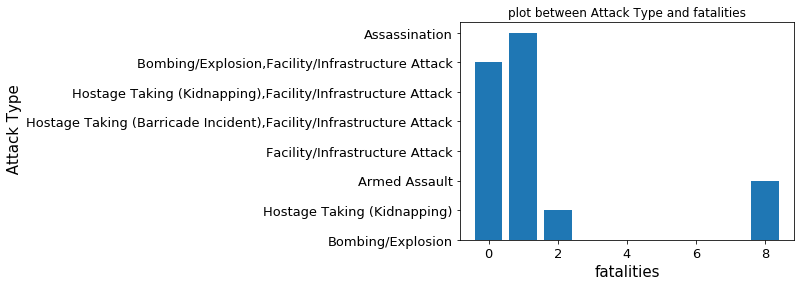

In [154]:
plt.bar(main.fatalities,main.attack_type)
plt.xlabel('fatalities')
plt.ylabel(' Attack Type')
plt.title('plot between Attack Type and fatalities')


From above graph Atleast one fatalities from different types of attack.

Text(0.5, 1.0, 'plot between city and date')

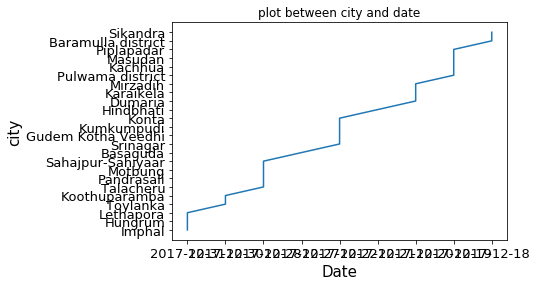

In [153]:
main=data.head(25)
plt.plot(main.date,main.city)
plt.xlabel('Date')
plt.ylabel('city')
plt.title('plot between city and date')


Text(0.5, 1.0, 'Bar plot for Target Type')

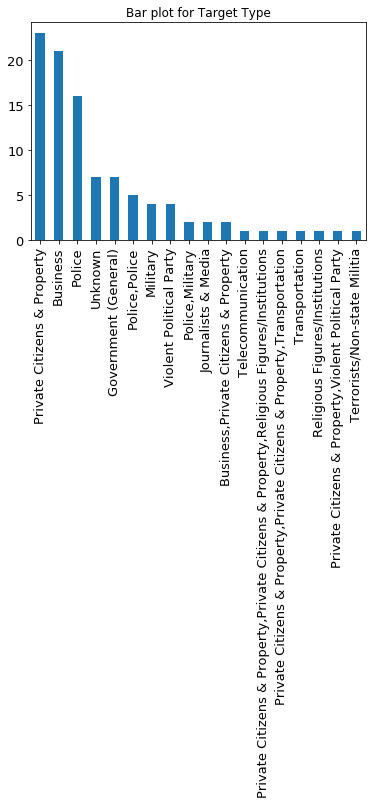

In [166]:
ad = data['target_type'].value_counts()
ad.plot(kind = 'bar')
plt.title('Bar plot for Target Type')


Mostly citizens are targeted in terrorist attack.

In [155]:
asd=data['attack_type'].value_counts(ascending=True).to_frame().reset_index().rename({'index':'attack_type','attack_type':'counts'})
asd

,index,attack_type
0,Unarmed Assault,1
1,"Armed Assault,Facility/Infrastructure Attack",1
2,"Bombing/Explosion,Facility/Infrastructure Attack",2
3,"Hostage Taking (Barricade Incident),Facility/I...",2
4,"Bombing/Explosion,Armed Assault",3
5,"Hostage Taking (Kidnapping),Facility/Infrastru...",3
6,"Unarmed Assault,Facility/Infrastructure Attack",4
7,Assassination,8
8,Facility/Infrastructure Attack,10
9,Hostage Taking (Kidnapping),18


Text(0.5, 1.0, 'MOST SUCCESSFUL ATTACK TYPES')

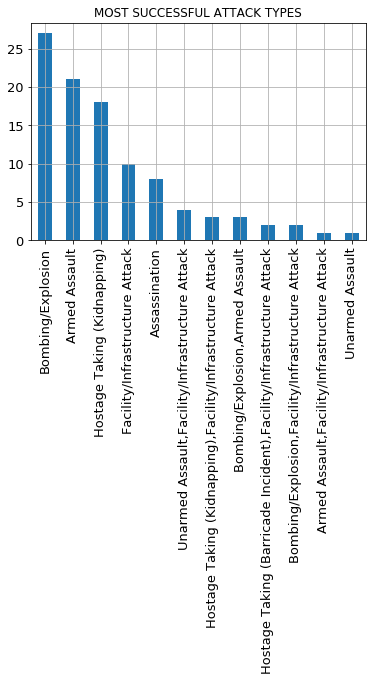

In [161]:
ad1 = data['attack_type'].value_counts()
ad1.plot(kind = 'bar')
plt.rcParams['axes.labelsize']=15
plt.grid(True)
plt.title('MOST SUCCESSFUL ATTACK TYPES')
sns.barplot(data=data,y='attack',x='casualties',ci=None)

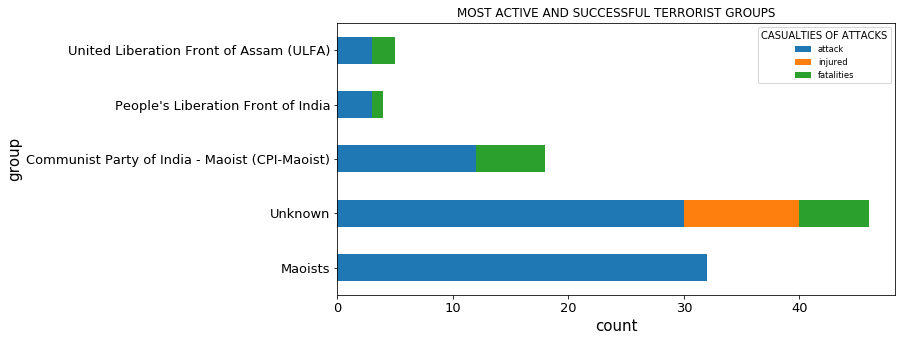

In [160]:
data[data['group'].isin(data['group'].value_counts()[0:5].index)][['group','injured','fatalities']].groupby('group').sum()\
.merge(data[data['group'].isin(data['group'].value_counts()[0:5].index)]['group'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'group','group':'attack'}), on='group')\
.sort_values(by='attack',ascending=False).plot.barh(x='group',y=['attack','injured','fatalities'],figsize=(10,5),stacked=True,width=0.5)
plt.title("MOST ACTIVE AND SUCCESSFUL TERRORIST GROUPS")
plt.xlabel('count')
plt.legend(title="CASUALTIES OF ATTACKS",loc=0,fontsize='small')

Text(0, 0.5, 'Attack Frequency -> ')

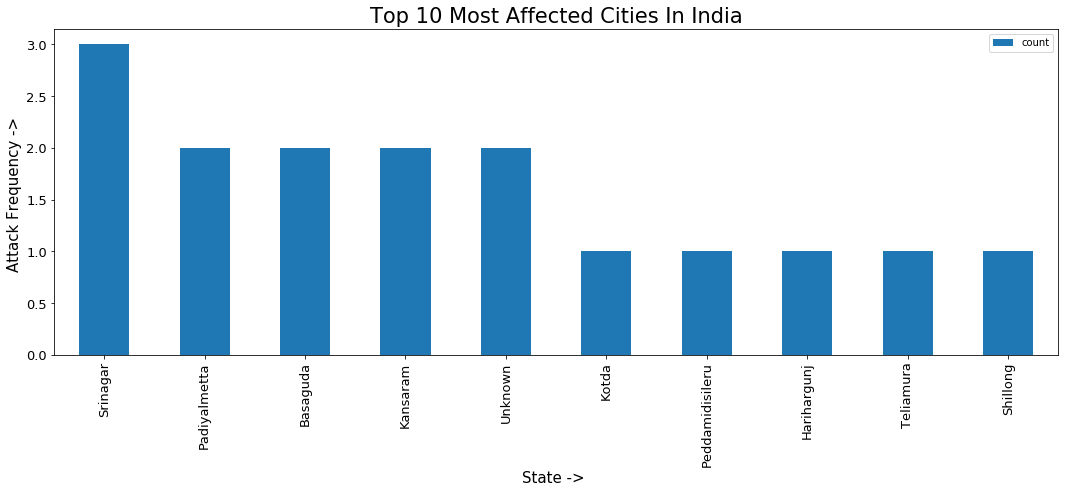

In [168]:
city_cnt=data[data['city'].isin(data['city'].value_counts()[1:11].index)]['city'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'city','city':'count'})
ax = city_cnt.plot.bar(x='city', figsize=(18,6))
ax.set_title('Top 10 Most Affected Cities In India',{'fontsize':21})
ax.set_xlabel('State -> ')
ax.set_ylabel('Attack Frequency -> ')

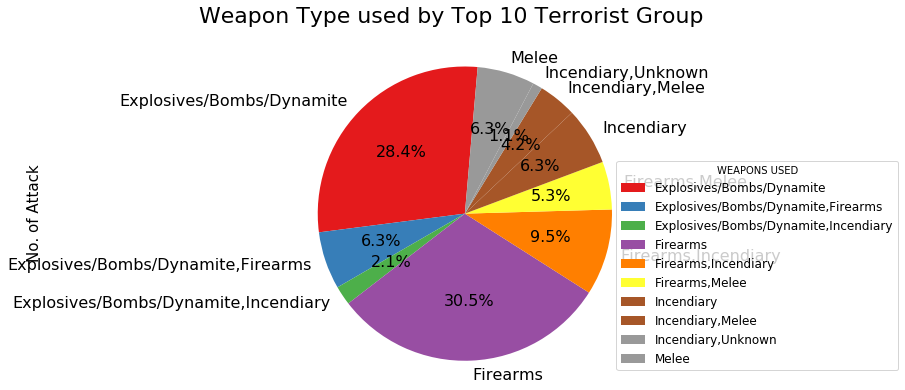

In [170]:
xattack=pd.crosstab(data['weapon_type'],data['group'],margins='All')
xattack=xattack[0:-1]
xattack.rename(columns={'All':'No. of Attack'},inplace=True)
xattack[0:-1].plot.pie(shadow=False,legend=False,y='No. of Attack',startangle=85,fontsize=16,figsize=(15,6),cmap='Set1',autopct='%1.1f%%',
                grid=True)
plt.axis('equal')
plt.legend(loc=0)
plt.suptitle('Weapon Type used by Top 10 Terrorist Group',fontsize = 22)
plt.legend(title="WEAPONS USED",loc=8,fontsize='large',bbox_to_anchor=(0.6, 0., 0.5, 0.7))